Generalized regression neural network (GRNN) is a variation to radial basis neural networks. GRNN was suggested by D.F. Specht in 1991.

GRNN can be used for regression, prediction, and classification. GRNN can also be a good solution for online dynamical systems.

GRNN represents an improved technique in the neural networks based on the nonparametric regression. The idea is that every training sample will represent a mean to a radial basis neuron.
Similar to RBFNN, GRNN has the following advantages:

Single-pass learning so no backpropagation is required.
High accuracy in the estimation since it uses Gaussian functions.
It can handle noises in the inputs.
It requires relatively few data to train.
The main disadvantages of GRNN are:

Its size can be huge, which would make it computationally expensive.
There is no optimal method to improve it.

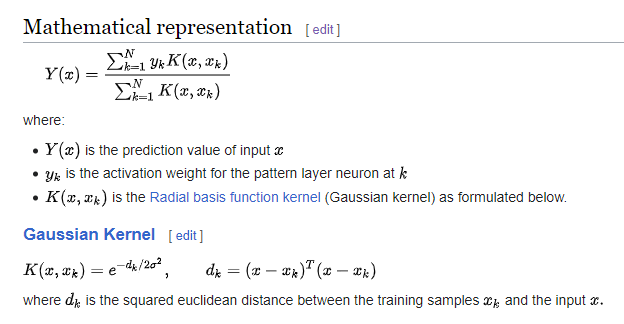

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from GeneralizedRegressionNeuralNetworks import GRNN
from sklearn import datasets, preprocessing, metrics
import matplotlib.pyplot as plt

In [ ]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [ ]:
mms1 = preprocessing.StandardScaler()
X_scaled = mms1.fit_transform(X_df)
mms2 = preprocessing.StandardScaler()
y_scaled = mms2.fit_transform(y_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.1, random_state=13)

reg = GRNN(X_train,y_train,X_test,y_test)
y_pred = reg.predict()
test_score = np.array(reg.mean_squared_error())
test_score = test_score[:,0]
print(test_score)

r2 = metrics.r2_score(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MAPE: {mape}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

[1.7219514  0.92142268 0.90661678 1.52472524 1.76797993 0.91400474
 1.53910123 1.16207149 1.16624889 0.95139424 0.90293405 1.71180528
 1.00888381 1.67652996 1.49144359 1.27749222 1.16624889 1.73722679
 1.05608964 1.2298094  0.9665599  0.82381005 0.8557405  0.8557405
 1.15790157 1.77829094 0.91030702 1.37557855 1.28187199 0.76854381
 1.65653753 1.62677372 1.07206476 1.65155815 1.0841248  1.20418283
 1.27749222 1.17462619 1.1330395  1.28187199 0.7890438  1.11661468
 1.29505628 0.94762157 1.82506147]
R2 Score: -62.48013881900406
MAPE: 222.3017663340564
MAE: 7.407149367881268
MSE: 55.74399459831797


In [ ]:
y_test.shape

(45, 1)

In [ ]:
y_pred.shape

(45,)

In [ ]:
#maybe the dataset is too large?

trying another implementation

In [3]:
pip install pyGRNN

In [34]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from pyGRNN import GRNN
# Loading the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(X),
                                                    preprocessing.minmax_scale(y.reshape((-1, 1))),
                                                    test_size=0.25)

# Example 1: use Isotropic GRNN with a Grid Search Cross validation to select the optimal bandwidth
IGRNN = GRNN()
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=5
                          )
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test)
mse_IGRNN = mean_squared_error(y_test, y_pred)

Fitting 5 folds for each of 390 candidates, totalling 1950 fits
[CV 1/5] END calibration=None, kernel=RBF, sigma=0.1;, score=-0.040 total time=   0.0s
[CV 2/5] END calibration=None, kernel=RBF, sigma=0.1;, score=-0.034 total time=   0.0s
[CV 3/5] END calibration=None, kernel=RBF, sigma=0.1;, score=-0.040 total time=   0.0s
[CV 4/5] END calibration=None, kernel=RBF, sigma=0.1;, score=-0.046 total time=   0.0s
[CV 5/5] END calibration=None, kernel=RBF, sigma=0.1;, score=-0.045 total time=   0.0s
[CV 1/5] END calibration=None, kernel=RBF, sigma=0.11;, score=-0.036 total time=   0.0s
[CV 2/5] END calibration=None, kernel=RBF, sigma=0.11;, score=-0.033 total time=   0.0s
[CV 3/5] END calibration=None, kernel=RBF, sigma=0.11;, score=-0.038 total time=   0.0s
[CV 4/5] END calibration=None, kernel=RBF, sigma=0.11;, score=-0.044 total time=   0.0s
[CV 5/5] END calibration=None, kernel=RBF, sigma=0.11;, score=-0.044 total time=   0.0s
[CV 1/5] END calibration=None, kernel=RBF, sigma=0.12;, score

In [25]:
grid_IGRNN.score(X_test, y_test)

-0.03110895783522474

In [27]:
best_model.score(X_test, y_test)

0.48576231529123337

In [9]:
print(f"MSE Score: {mean_squared_error(y_test, y_pred)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE Score: 0.03110895783522474
MAE Score: 0.14771058044967614
MAPE Score: 0.6605947916818827
R2 Score: 0.48576231529123337


In [13]:
y.shape

(442,)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_test)
X_pca

array([[-0.50132112],
       [-0.22896185],
       [-0.58607234],
       [-0.33855659],
       [-0.51523858],
       [-0.38729775],
       [ 0.48603921],
       [-0.19141165],
       [-0.43015738],
       [ 0.58901221],
       [ 0.68825458],
       [-0.56137868],
       [-0.44143582],
       [ 0.59304834],
       [ 0.4076116 ],
       [-0.34723544],
       [-0.63083222],
       [ 0.66983611],
       [-0.57381589],
       [ 0.76090972],
       [ 0.49880866],
       [ 0.60363512],
       [-0.20022635],
       [-0.58845665],
       [ 0.5171555 ],
       [-0.41544028],
       [-0.23114522],
       [-0.47454983],
       [ 0.46720078],
       [-0.24115424],
       [ 0.75364069],
       [ 0.62831759],
       [-0.31567925],
       [ 0.6009504 ],
       [ 0.50393618],
       [ 0.46192572],
       [ 0.54566243],
       [ 0.65317654],
       [ 0.58920544],
       [ 0.62246731],
       [-0.46308171],
       [-0.62932717],
       [-0.30074228],
       [-0.40322263],
       [-0.47017293],
       [-0

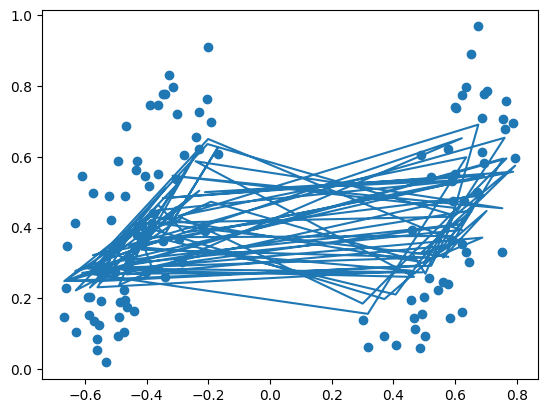

In [19]:
plt.scatter(X_pca,y_test)
plt.plot(X_pca, y_pred)
plt.show()

In [37]:
X_pca.shape

(111, 1)